In [1]:
# %load_ext autoreload
# %autoreload 2

In [2]:
from taxisim.model import SimulationModel
from taxisim.taxi import TaxiService
from taxisim.taxi.strat import any_free_car
from taxisim.taxi.strat import price_per_unit
from taxisim.friends import FriendsService
from taxisim.model import Parameters
from taxisim.point import Point

In [18]:
TICKS_PER_HOUR = 20 # 1 tick = 3 mins
TICKS_PER_DAY = 24 * TICKS_PER_HOUR

BALANCE_INCREMENT = 50 / TICKS_PER_DAY
PRICE_PER_UNIT = 0.0
CAR_SPEED = (80 * 1000) / TICKS_PER_HOUR # 60km/h
LONELY_CHANCE = 2 / TICKS_PER_DAY
TIRED_CHANCE = 0.3 / TICKS_PER_HOUR
SHOULD_WAIT = lambda t, p: True
INITIAL_BALANCE = 100

CARS_COUNT = 150
HUMAN_COUNT = 3000
CITYBOX = Point.from_numbers(0, 0), Point.from_numbers(30000, 30000)

In [19]:
taxi = TaxiService(
    car_finder=any_free_car(), price_calculator=price_per_unit(PRICE_PER_UNIT)
)
friends = FriendsService()

simulation = SimulationModel(
    taxi=taxi,
    friends=friends,
    cars=CARS_COUNT,
    people=HUMAN_COUNT,
    n_ticks=TICKS_PER_DAY * 7,
    parameters=Parameters(
        lonely_chance=LONELY_CHANCE,
        car_speed=CAR_SPEED,
        tired_chance=TIRED_CHANCE,
        waiter=SHOULD_WAIT,
        balance_increment=BALANCE_INCREMENT,
        initial_balance=INITIAL_BALANCE,
        city_box=CITYBOX,
    ),
)

with taxi:
    with friends:
        simulation.run_model(with_progress=True)


100%|██████████| 3360/3360 [01:36<00:00, 34.98it/s]


In [20]:
model_vars = simulation.get_statistics()
wait_time = model_vars.drop(model_vars.columns.difference(['AverageWaitTime']), axis=1)
wait_time.tail()

,AverageWaitTime
3355,4.369176
3356,4.369085
3357,4.368796
3358,4.368494
3359,4.368466


<AxesSubplot:>

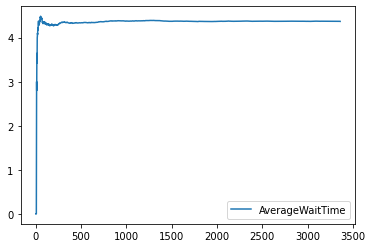

In [21]:
wait_time.plot()